In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [7]:
df = df.drop("Serial No.",axis=1)


In [8]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
x = df.drop("Chance of Admit ",axis=1)
y = df["Chance of Admit "]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(400, 7) (400,)
(100, 7) (100,)


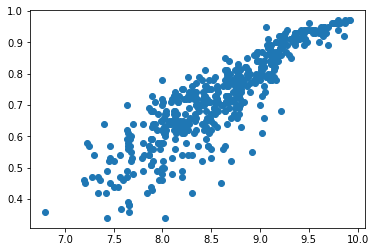

In [10]:
plt.scatter(df["CGPA"],df["Chance of Admit "])

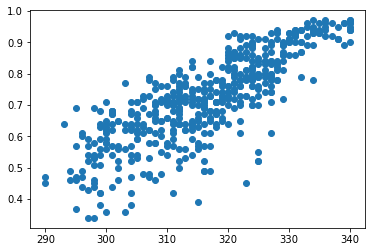

In [11]:
plt.scatter(df["GRE Score"],df["Chance of Admit "])

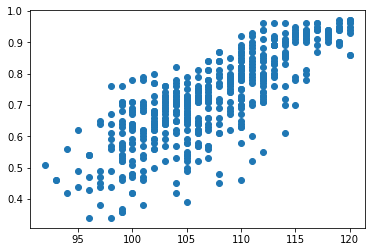

In [12]:
plt.scatter(df["TOEFL Score"],df["Chance of Admit "])

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

lr = Pipeline(steps=[("Scaler" , MinMaxScaler(feature_range=(0,1))),
                    ("Regressor" , LinearRegression())])

lr.fit(x_train,y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()), ('Regressor', LinearRegression())])

In [14]:
lr2 = LinearRegression()
lr2.fit(x_train,y_train)

LinearRegression()

In [36]:
lr3 = Ridge(alpha=10)
lr3.fit(x_train,y_train)

lr4 = Lasso(alpha=0.001)
lr4.fit(x_train,y_train)
print(lr4.coef_)

[0.0017887  0.00318113 0.00828498 0.00031225 0.01761773 0.112234
 0.02423448]


In [16]:
lr2.predict(x_test)

array([0.63897201, 0.74514559, 0.81307026, 0.78043499, 0.77290394,
       0.76115854, 0.89828189, 0.93938788, 0.60677877, 0.77862501,
       0.63674338, 0.63807606, 0.56656415, 0.78097255, 0.75055858,
       0.72132078, 0.59667051, 0.77484866, 0.63891264, 0.60723042,
       0.88623108, 0.56413926, 0.61933178, 0.61780641, 0.56026381,
       0.84333228, 0.96041257, 0.61834023, 0.67182772, 0.83128175,
       0.62922202, 0.48649733, 0.84345448, 0.64487638, 0.68357788,
       0.55329633, 0.51803359, 0.74284115, 0.74992916, 0.99149971,
       0.65388698, 0.60844898, 0.76974476, 0.57872064, 0.62021513,
       0.61936959, 0.72727452, 0.66606285, 0.68006793, 0.54729497,
       0.75841635, 0.7372869 , 0.66107788, 0.80845054, 0.90930772,
       0.49794303, 0.86927325, 0.56897968, 0.68304233, 0.65057397,
       0.80408544, 0.62836514, 0.71315108, 0.80594159, 0.9022119 ,
       0.5125383 , 0.61912236, 0.58923062, 0.77121916, 0.69595622,
       0.50908364, 0.68663525, 0.65816671, 0.7911073 , 0.66059

Text(0, 0.5, 'Predict')

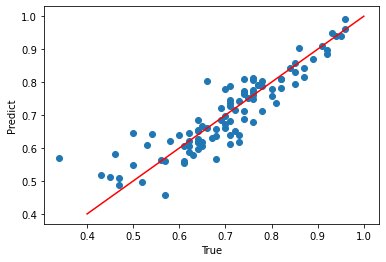

In [17]:
x = np.linspace(0.4,1,100)
plt.scatter(y_test,lr2.predict(x_test))
plt.plot(x,x,c="red")
plt.xlabel("True")
plt.ylabel("Predict")

Text(0, 0.5, 'Predict')

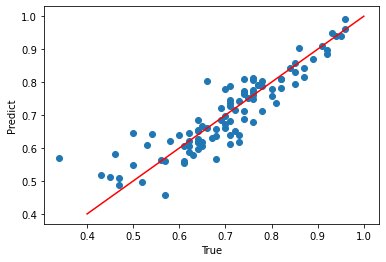

In [18]:
x = np.linspace(0.4,1,100)
plt.scatter(y_test,lr.predict(x_test))
plt.plot(x,x,c="red")
plt.xlabel("True")
plt.ylabel("Predict")

Text(0, 0.5, 'Predict')

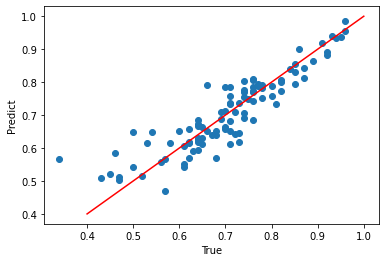

In [19]:
x = np.linspace(0.4,1,100)
plt.scatter(y_test,lr3.predict(x_test))
plt.plot(x,x,c="red")
plt.xlabel("True")
plt.ylabel("Predict")

Text(0, 0.5, 'Predict')

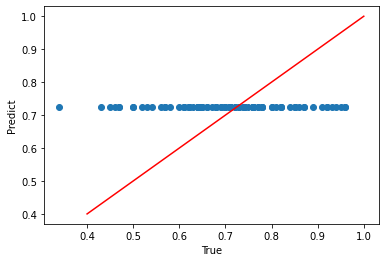

In [20]:
x = np.linspace(0.4,1,100)
plt.scatter(y_test,lr4.predict(x_test))
plt.plot(x,x,c="red")
plt.xlabel("True")
plt.ylabel("Predict")

In [21]:
print(lr2.intercept_)
lr2.coef_

-1.176943184145617


array([0.00141173, 0.00283947, 0.0081495 , 0.00013298, 0.01774963,
       0.12165359, 0.02958913])

In [22]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [23]:
y2 = -1.19 + 0.001*x_test["GRE Score"] + 0.002*x_test["TOEFL Score"] + 0.005*x_test["University Rating"] + 0.003*x_test["SOP"] + 0.016*x_test["LOR "] + 0.12*x_test["CGPA"] + 0.022*x_test["Research"] 

In [24]:
y2

418    0.3861
433    0.4848
243    0.5433
242    0.5107
305    0.5085
        ...  
308    0.4351
119    0.5178
104    0.5415
88     0.4013
386    0.3427
Length: 100, dtype: float64

In [25]:
y_test

418    0.60
433    0.71
243    0.76
242    0.70
305    0.74
       ... 
308    0.69
119    0.71
104    0.74
88     0.64
386    0.46
Name: Chance of Admit , Length: 100, dtype: float64

In [26]:
y3 = -1.19 + 0.00173968*x_test["GRE Score"] + 0.0020743 *x_test["TOEFL Score"] + 0.00522603*x_test["University Rating"] + 0.00371924*x_test["SOP"] + 0.01687725*x_test["LOR "] + 0.12143035*x_test["CGPA"] + 0.02206231*x_test["Research"] 

In [27]:
y3

418    0.640153
433    0.747169
243    0.810986
242    0.777320
305    0.772951
         ...   
308    0.691933
119    0.786467
104    0.809791
88     0.660212
386    0.590294
Length: 100, dtype: float64

In [44]:
from sklearn.linear_model import ElasticNet

lr5 = ElasticNet(l1_ratio=0.1,alpha=0.1)
lr5.fit(x_train,y_train)

print("intercept",lr5.intercept_)
print("coef",lr5.coef_)

intercept -1.7927693728178995
coef [0.00495982 0.00691389 0.00904833 0.00370248 0.01404314 0.01342963
 0.        ]


Text(0, 0.5, 'Predict')

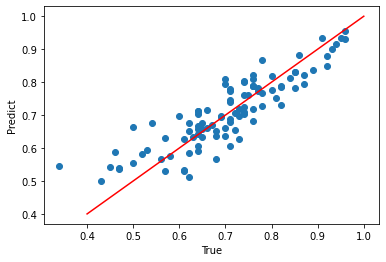

In [41]:
x = np.linspace(0.4,1,100)
plt.scatter(y_test,lr5.predict(x_test))
plt.plot(x,x,c="red")
plt.xlabel("True")
plt.ylabel("Predict")

In [52]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
y_pred1 = lr.predict(x_test)
y_pred2 = lr2.predict(x_test)
y_pred3 = lr3.predict(x_test)
y_pred4 = lr4.predict(x_test)
y_pred5 = lr5.predict(x_test)

predictions = [y_pred1,y_pred2,y_pred3,y_pred4,y3,y2,y_pred5]
for i in predictions:
    print(mse(y_test,i))
    
print("--"*5,"r2","--"*5)

for j in predictions:
    print(r2(y_test,j))

0.0030396439226486782
0.0030396439226486748
0.0029945240611740378
0.002954414165680438
0.002956390589980446
0.068577084
0.003679476573201641
---------- r2 ----------
0.8061802630997524
0.8061802630997527
0.8090572841925291
0.8116148500092817
0.8114888253670607
-3.372746517850083
0.7653819988470429


## hanwrite
### earn Coefition 

In [50]:
# intercept is here in the first columns  
inter = np.concatenate([np.ones((x_train.shape[0],1)),x_train],axis=1)
w = np.linalg.inv(inter.T @ inter) @ inter.T @ y_train
w

array([-1.17694318e+00,  1.41173453e-03,  2.83946787e-03,  8.14950432e-03,
        1.32980296e-04,  1.77496346e-02,  1.21653585e-01,  2.95891288e-02])